In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import denovo
%matplotlib inline

In [2]:
simple_reads = ['CCCCACT', 'CCCACTGAAA', 'CTGAAAA']

In [3]:
start,followers = denovo.overlap_all_pairs_easy(simple_reads)
denovo.conjoiner(start,followers,simple_reads)

'CCCCACTGAAAA'

In [4]:
start,followers = denovo.overlap_all_pairs_tricky(simple_reads)
denovo.conjoiner(start,followers,simple_reads)

'CCCCACTGAAAA'

In [5]:
reads = denovo.readFastaReads('coding_challenge_data_set.txt')

50

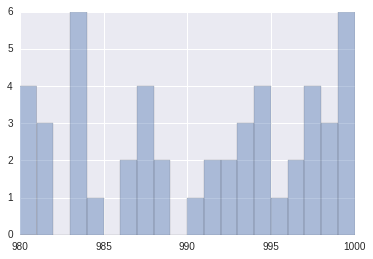

In [6]:
lns = [len(r) for r in reads]
sns.distplot(lns,bins=20,kde=False)
len(reads)

In [7]:
%%time
start,followers = denovo.overlap_all_pairs_easy(reads)


CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.1 ms


In [8]:
%%time
start,followers = denovo.overlap_all_pairs_tricky(reads)

CPU times: user 332 ms, sys: 12 ms, total: 344 ms
Wall time: 329 ms


In [9]:
%%time 
assmb = denovo.assemble('coding_challenge_data_set.txt')

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 42.9 ms


In [10]:
%%time 
assmb = denovo.assemble('coding_challenge_data_set.txt',1)

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 33.9 ms


In [11]:
import random
from math import floor

test_sequence = ''.join([random.choice(['A','C','T','G']) for i in range(10000)])

ind = 0
endspot=0
test_reads = []
max_seg = 70
while True:
    seg_size = random.randrange(floor(max_seg*3/4),max_seg)
    test_reads.append(test_sequence[ind:ind+seg_size])
    overlap_size = random.randrange(floor(seg_size/2),floor(seg_size*3/4))
    ind = ind + seg_size - overlap_size
    endspot = ind+overlap_size
    if(ind>len(test_sequence)-max_seg):
        break

test_seq = test_sequence[:endspot]

423
9985


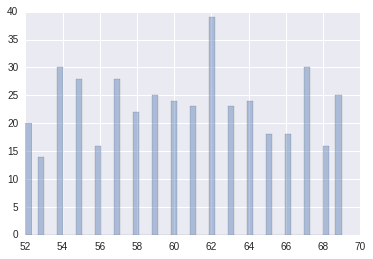

In [12]:
lns = [len(r) for r in test_reads]
sns.distplot(lns,bins=50,kde=False)
print len(test_reads)
print len(test_seq)

In [13]:
%%time
start,followers = denovo.overlap_all_pairs_easy(test_reads)

CPU times: user 1.55 s, sys: 88 ms, total: 1.64 s
Wall time: 1.45 s


In [14]:
%%time
start,followers = denovo.overlap_all_pairs_tricky(test_reads)

CPU times: user 188 ms, sys: 12 ms, total: 200 ms
Wall time: 186 ms


In [ ]:
%%time
answer_seq = denovo.conjoiner(start,followers,test_reads)
print answer_seq==test_seq